In [2]:
#1️⃣ Overview of the Data
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [3]:
df = pd.read_csv("../data/raw/data.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [16]:
# 2️⃣ Summary Statistics
df.tail()
df.shape
df.info()
df.describe()
df.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


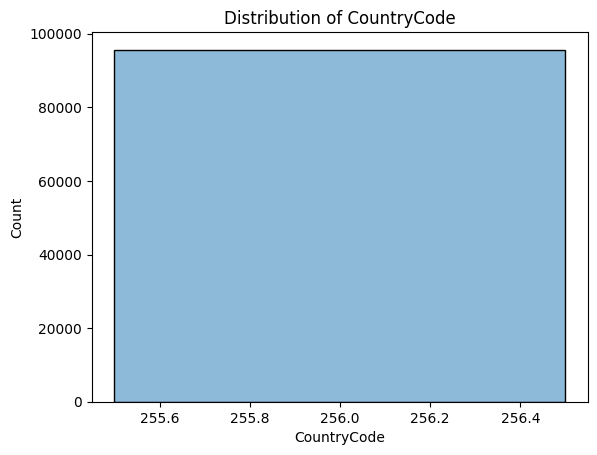

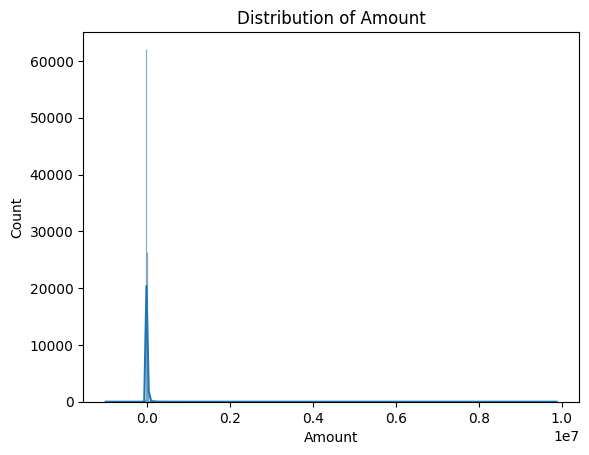

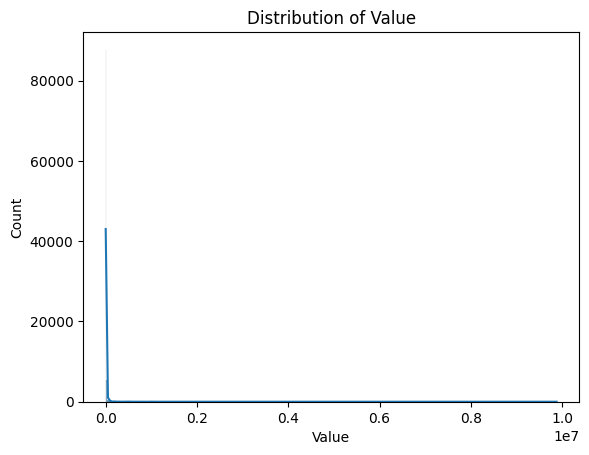

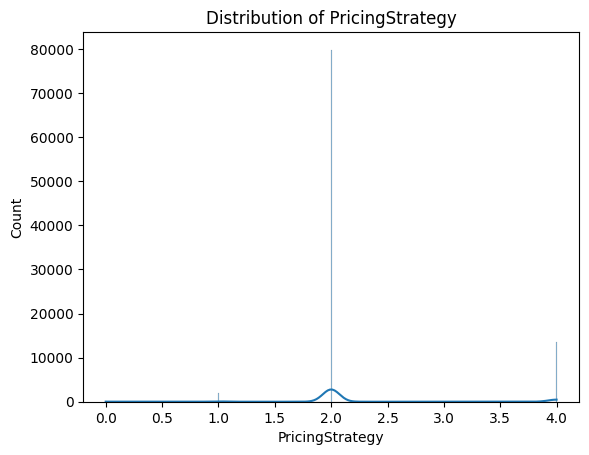

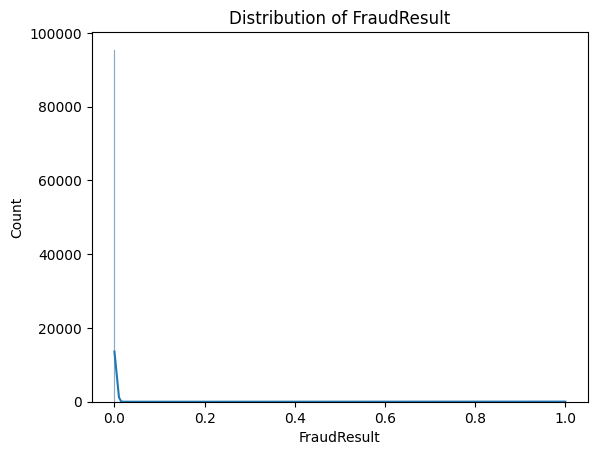

In [5]:
# 3️⃣ Distribution of Numerical Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

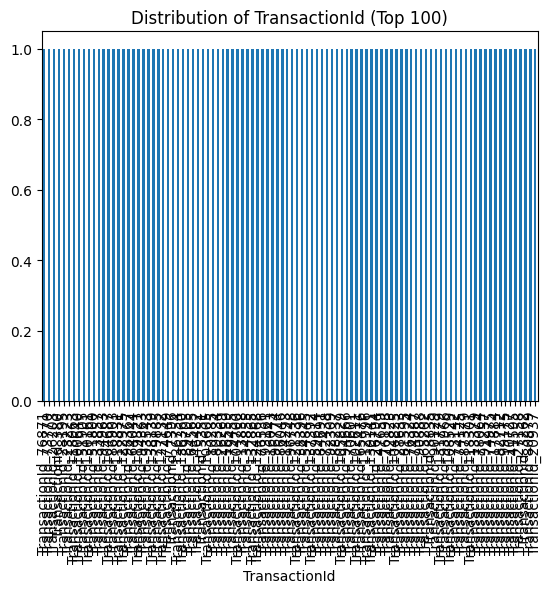

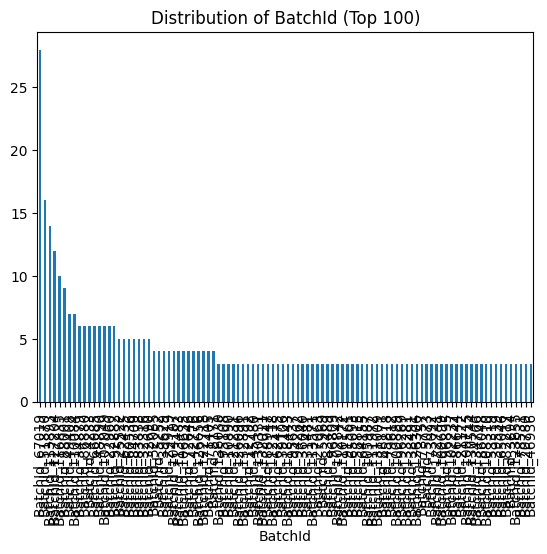

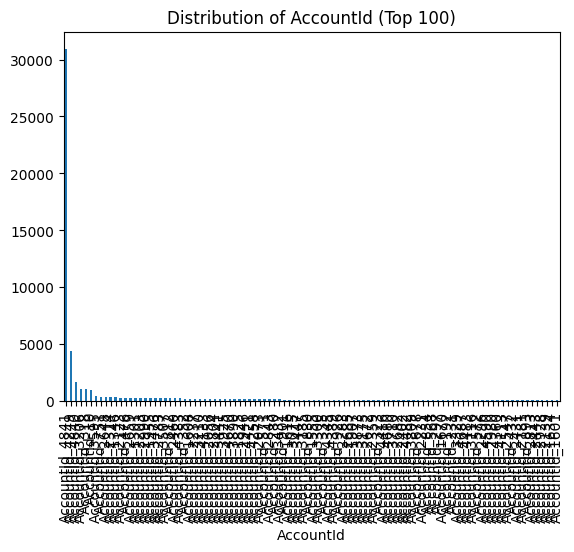

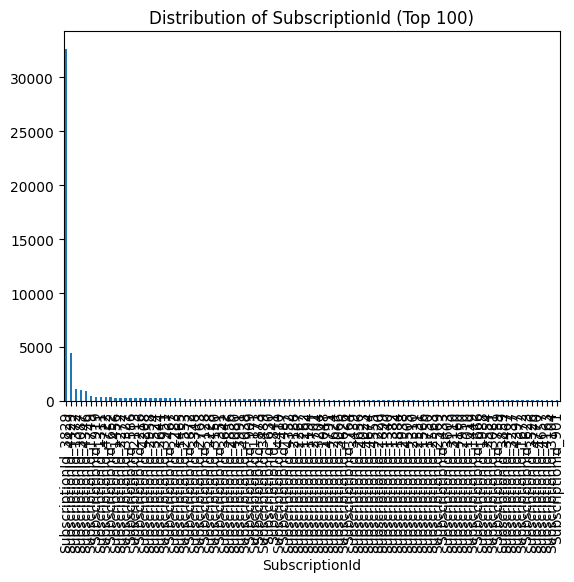

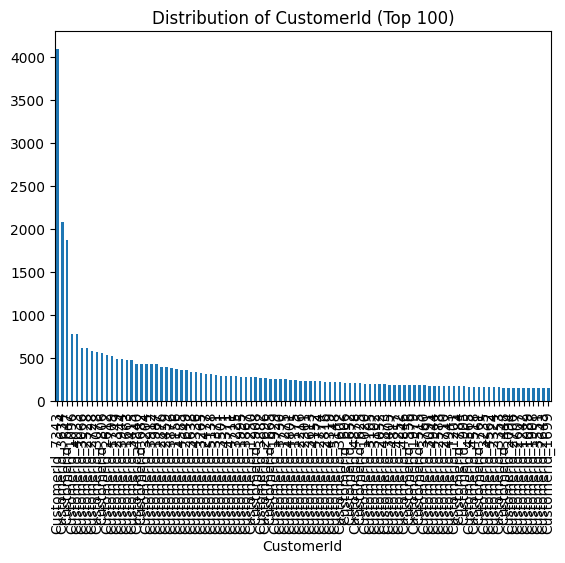

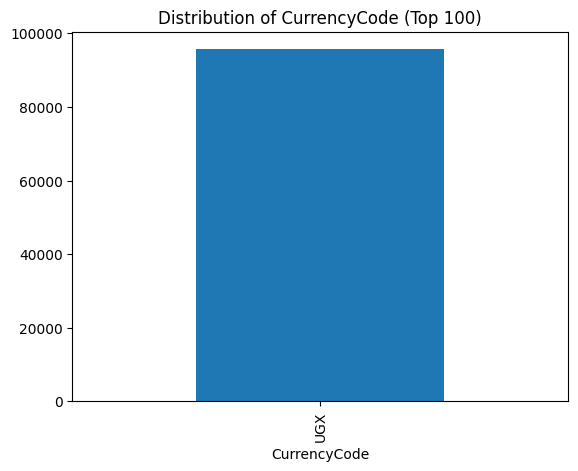

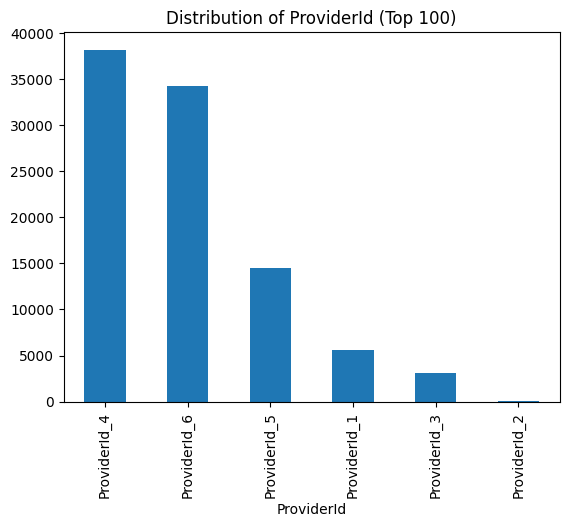

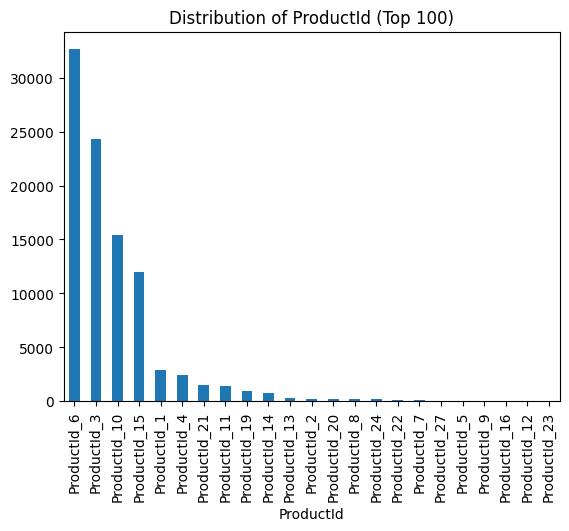

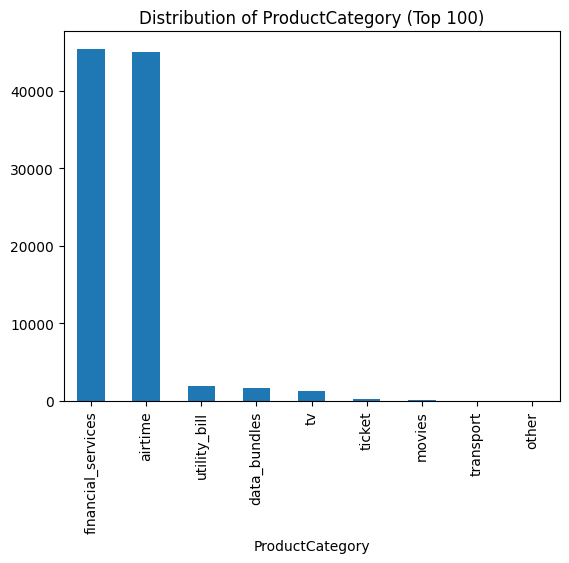

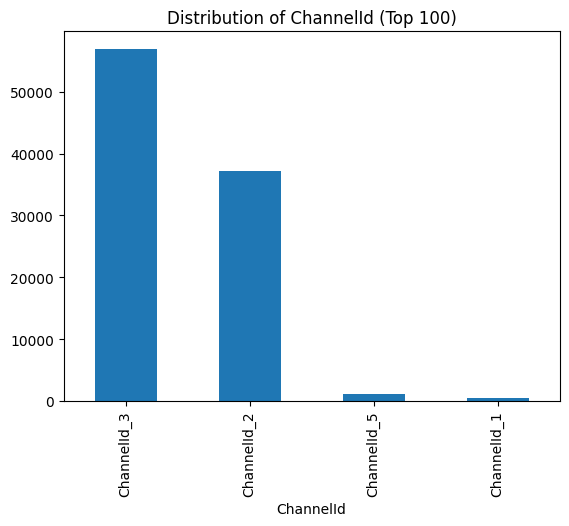

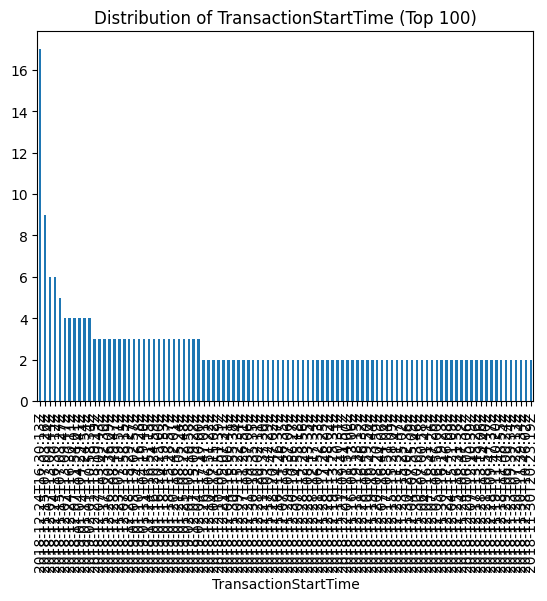

In [7]:
top_n = 100  # Only show top 10 categories
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().nlargest(top_n).plot(kind='bar')
    plt.title(f'Distribution of {col} (Top {top_n})')
    plt.show()

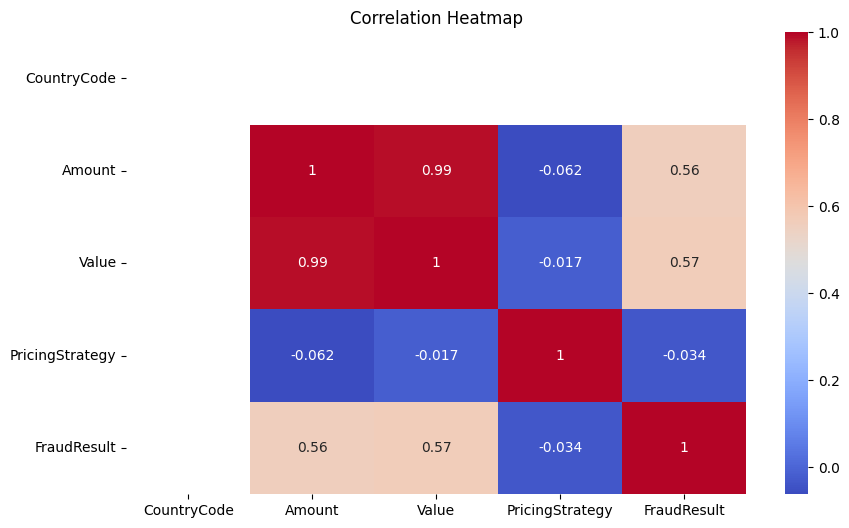

In [11]:
# 5️⃣ Correlation Analysis
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# 6️⃣ Identifying Missing Values
df.isnull().sum()
df.isnull().mean() * 100

TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

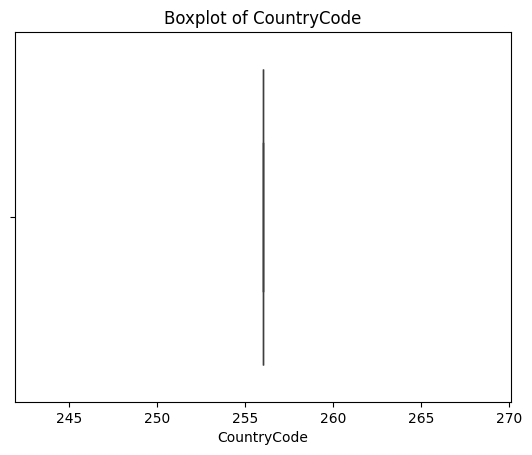

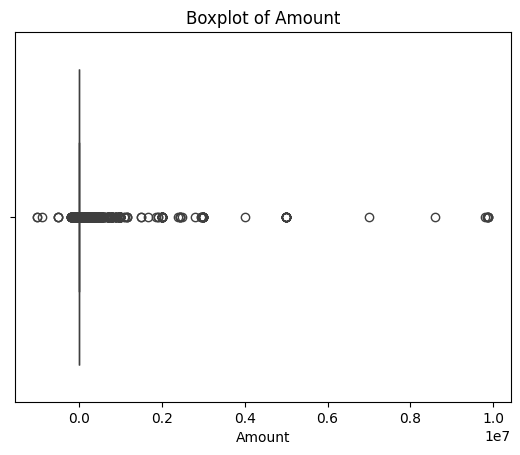

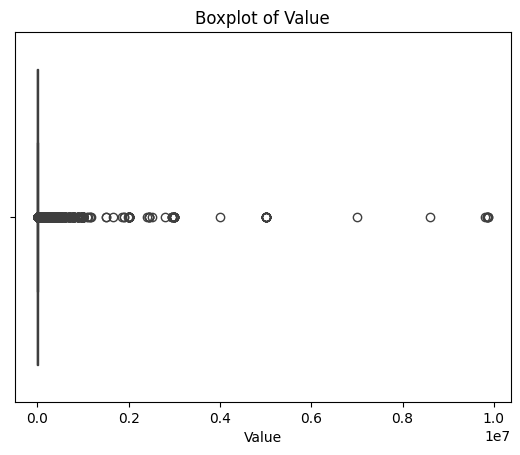

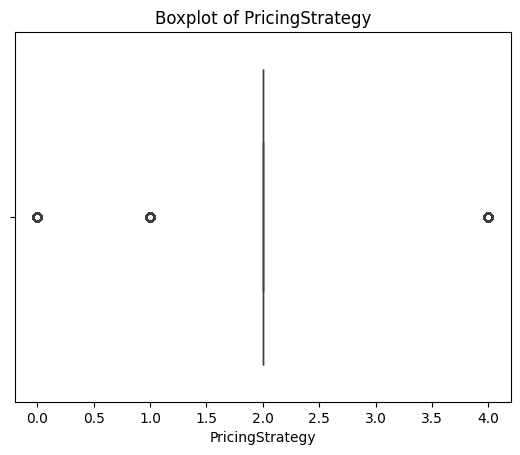

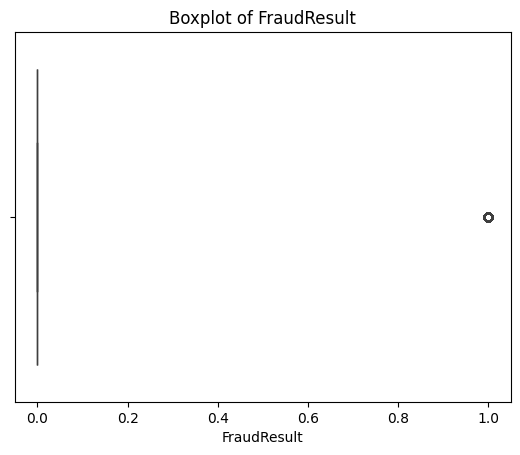

In [10]:
# 7️⃣ Outlier Detection (Boxplots)
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

# 📊 Top 5 Insights from Exploratory Data Analysis

## 1. Extreme Class Imbalance in FraudResult
- The target variable (`FraudResult`) is highly imbalanced, with more than **99.8%** of transactions labeled as non-fraudulent.
- Fraudulent transactions represent a very small minority of the data.
- This imbalance suggests that resampling techniques or alternative evaluation metrics (e.g., precision, recall, PR-AUC) will be necessary during model development.

## 2. Skewed Distributions in Amount and Value
- The numerical features `Amount` and `Value` exhibit strong right-skewed distributions with long tails.
- Several extreme outliers are present in both features.
- Negative values observed in `Amount` likely represent refunds or transaction reversals and may require special preprocessing.

## 3. Dominance of Specific Categorical Features
- The `CurrencyCode` feature contains only a single value (`UGX`), indicating no currency variation.
- The `CountryCode` feature is constant (`256`) across all observations.
- `ProductCategory` is highly concentrated in a small number of categories, primarily `"financial_services"` and `"airtime"`, which may dominate model behavior.

## 4. Strong Correlation Between Amount and Value
- A very strong positive correlation (**ρ ≈ 0.99**) exists between `Amount` and `Value`.
- This near-perfect linear relationship suggests potential redundancy between the two variables.
- Feature selection or dimensionality reduction techniques may be applied to address multicollinearity.

## 5. High Concentration in Identifier-Based Features
- The categorical identifier features (`AccountId`, `SubscriptionId`, and `CustomerId`) show a highly uneven frequency distribution.
- A small number of identifiers account for a large proportion of transactions.
- This pattern may indicate power users or systematic transaction behavior and could be useful for segmentation or anomaly detection.